# Problem 2

In [14]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist

from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [15]:
def run_pca(X_train, X_test, n_components):
    """ Run Principal Component Analysis given the number of components. """
    
    pca = PCA(n_components=n_components)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    return X_train, X_test


def plot_confusion_matrix(validations, predictions):
    """ Plot confusion matrix and compare real labels with predicted labels. """

    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def parse_spambase_dataset(filename):
    """ Exclusive for spambase data. """

    spambase_data, spambase_labels = [], []
    with open(filename) as f:
        line = f.readline()
        while line:
            elements = [float(v) for v in line.split(',')]
            vectors, label = elements[:-1], int(elements[-1])
            spambase_data.append(vectors)
            spambase_labels.append(label)
            line = f.readline()
    return np.array(spambase_data), spambase_labels

In [16]:
(X_train, y_train) , (X_test, y_test)= fashion_mnist.load_data()
X_train = normalize(X_train.flatten().reshape(60000, 784))
X_test = normalize(X_test.flatten().reshape(10000, 784))
LABELS = set(y_train)

print('X_train shape -', X_train.shape)
print('y_train shape -', y_train.shape)
print('Labels -', ', '.join([str(label) for label in LABELS]))

X_train shape - (60000, 784)
y_train shape - (60000,)
Labels - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9


## A)
### D=5 features on MNIST

In [4]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print('X_train shape -', X_train.shape, '(after pca)')
print('X_test shape -', X_test.shape, '(after pca)')

X_train shape - (60000, 5) (after pca)
X_test shape - (10000, 5) (after pca)


In [5]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

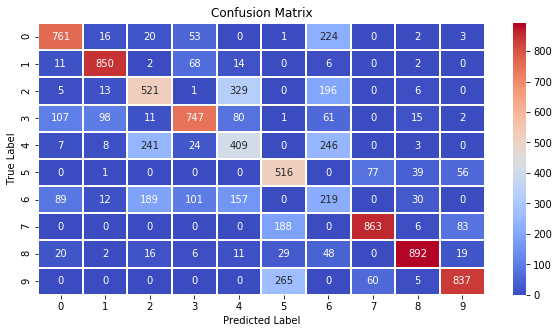

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1080
           1       0.85      0.89      0.87       953
           2       0.52      0.49      0.50      1071
           3       0.75      0.67      0.70      1122
           4       0.41      0.44      0.42       938
           5       0.52      0.75      0.61       689
           6       0.22      0.27      0.24       797
           7       0.86      0.76      0.81      1140
           8       0.89      0.86      0.87      1043
           9       0.84      0.72      0.77      1167

    accuracy                           0.66     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.68      0.66      0.67     10000



In [6]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

### D=20 features on MNIST

In [11]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print('X_train shape -', X_train.shape, '(after pca)')
print('X_test shape -', X_test.shape, '(after pca)')

X_train shape - (60000, 20) (after pca)
X_test shape - (10000, 20) (after pca)


In [12]:
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
predictions = lr.predict(X_test)

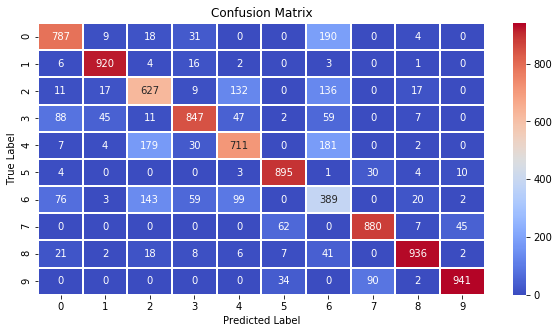

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1039
           1       0.92      0.97      0.94       952
           2       0.63      0.66      0.64       949
           3       0.85      0.77      0.80      1106
           4       0.71      0.64      0.67      1114
           5       0.90      0.95      0.92       947
           6       0.39      0.49      0.43       791
           7       0.88      0.89      0.88       994
           8       0.94      0.90      0.92      1041
           9       0.94      0.88      0.91      1067

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.80      0.79      0.80     10000



In [13]:
plot_confusion_matrix(predictions, y_test)
print(classification_report(predictions, y_test))

## B)
### PCA on Spambase

In [17]:
spambase_data, spambase_labels = parse_spambase_dataset('spambase.data')
spambase_data, spambase_labels = shuffle(spambase_data, spambase_labels)

In [18]:
X_train, y_train = spambase_data[:4000], spambase_labels[:4000]
X_test, y_test = spambase_data[4000:], spambase_labels[4000:]
LABELS = set(y_train)
print('X_train shape -', X_train.shape)
print('y_train shape -', len(y_train))
print('X_test shape -', X_test.shape)
print('y_test shape -', len(y_test))
print('Labels -', LABELS)

X_train shape - (4000, 57)
y_train shape - 4000
X_test shape - (601, 57)
y_test shape - 601
Labels - {0, 1}


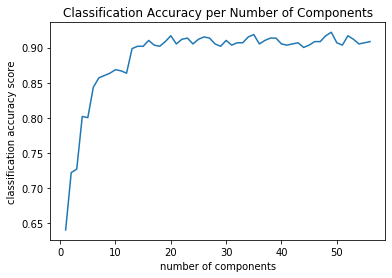

In [19]:
components_nums, accuracy_scores = [], []
for n_components in range(1, len(X_train[0])):
    X_pca_train, X_pca_test = run_pca(X_train, X_test, n_components)
    lr = LogisticRegression(max_iter=100).fit(X_pca_train, y_train)
    predictions = lr.predict(X_pca_test)
    components_nums.append(n_components)
    accuracy_scores.append(accuracy_score(y_test, predictions))

plt.title('Classification Accuracy per Number of Components')
plt.xlabel('number of components')
plt.ylabel('classification accuracy score')
plt.plot(components_nums, accuracy_scores)